In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/evaluation/Evaluation 1.csv
/kaggle/input/dataset/Dataset.csv


In [2]:
# first of all uplaoding the data using the panda

data=pd.read_csv("/kaggle/input/dataset/Dataset.csv")
print(data.head())

       ID  MACHINE_ID      DATE REGION_CLUSTER MAINTENANCE_VENDOR  \
0   68363      100306  12/16/15              B                  O   
1  107660      100457   6/22/15              A                  J   
2  102436      100441    3/7/15              B                  J   
3  108768      100460    7/3/16              D                  L   
4  108254      100460    2/5/15              D                  L   

  MANUFACTURER  WELL_GROUP      S15     S17    S13           S5      S16  \
0            Z           4  23.0400    0.00  25.60  2150.000000  10.2128   
1            S           1  20.7180    6.64  35.80  4260.210526   0.0000   
2            Q           3  24.2400    0.00  32.92  3917.000000  10.4066   
3            W           4  10.4305  186.16  27.33  2432.000000   8.0769   
4            W           4   8.2516  203.83  30.38  2704.000000   6.7431   

    S19    S18          S8  AGE_OF_EQUIPMENT  EQUIPMENT_FAILURE  
0   7.9   89.2  108.490000              1219                  

In [3]:
# explore the data 
print(data.describe())
print (data.columns)


                  ID     MACHINE_ID     WELL_GROUP            S15  \
count  145359.000000  145359.000000  145359.000000  145359.000000   
mean    74913.977270  100320.368997       2.497554      14.196806   
std     43247.788839     178.456256       1.093891       8.666232   
min         1.000000  100001.000000       1.000000       0.000000   
25%     37477.500000  100164.000000       2.000000       7.548000   
50%     74899.000000  100328.000000       2.000000      11.088000   
75%    112333.500000  100472.000000       3.000000      22.080000   
max    149855.000000  100612.000000       4.000000      51.225600   

                 S17            S13             S5            S16  \
count  145359.000000  145359.000000  145359.000000  145359.000000   
mean       85.864514      35.652372    4559.048392       7.925264   
std        85.558299      14.719491    2500.392481       2.426455   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      28.2600

In [4]:
# check for any na
print(data.isna().sum())

ID                    0
MACHINE_ID            0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
S8                    0
AGE_OF_EQUIPMENT      0
EQUIPMENT_FAILURE     0
dtype: int64


In [5]:
# convert any categorize feature to a numerical one
data["REGION_CLUSTER"]=pd.factorize(data["REGION_CLUSTER"])[0]
data["MAINTENANCE_VENDOR"]=pd.factorize(data["MAINTENANCE_VENDOR"])[0]
data["MANUFACTURER"]=pd.factorize(data["MANUFACTURER"])[0]

In [6]:
# we will drop the data  I belive ther are not important feature
data.drop(columns="DATE",axis=1,inplace=True)
data.drop(columns="ID",axis=1,inplace=True)
data.drop(columns="MACHINE_ID",axis=1,inplace=True)

In [7]:
# split the data to features and target x for features and y for target
x= data.drop(columns="EQUIPMENT_FAILURE")

y=data["EQUIPMENT_FAILURE"]
print(y.head(),y.value_counts())

0    0
1    0
2    0
3    0
4    0
Name: EQUIPMENT_FAILURE, dtype: int64 EQUIPMENT_FAILURE
0    145162
1       197
Name: count, dtype: int64


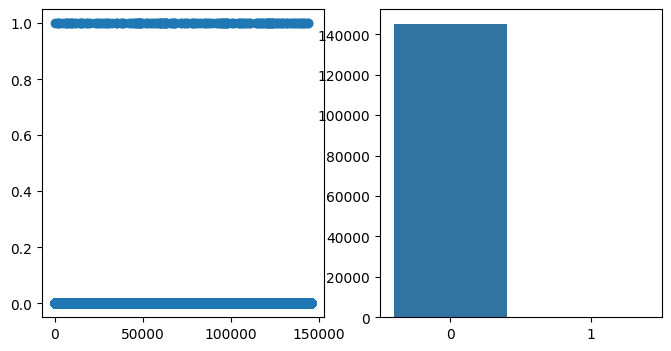

In [8]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ax[0].scatter(x.index,y.values)
indx,c=np.unique(y,return_counts=True)
sns.barplot(x=indx,y=c)
plt.show()

In [9]:
# sine we have imbalance data we will use SMOTE 
! pip install imbalanced-learn

In [10]:
from imblearn.over_sampling import SMOTE
x_resampled,y_resampled=SMOTE().fit_resample(x,y)

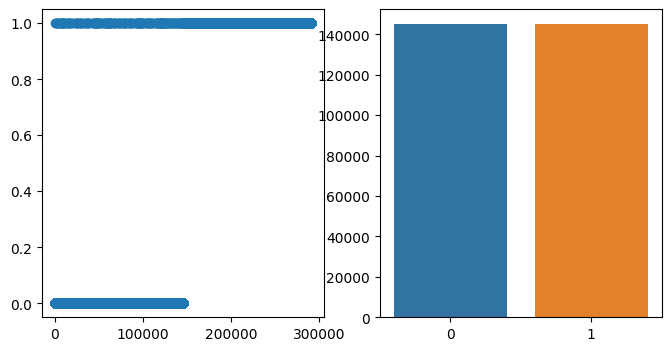

In [11]:
# plot the data after resample 
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ax[0].scatter(x_resampled.index,y_resampled.values)
indx,c=np.unique(y_resampled,return_counts=True)
sns.barplot(x=indx,y=c)
plt.show()

In [12]:
# for the sake of optamization we will normalize the data 
# using sklearn
#drop the 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_resampled)
print(x.head())

   REGION_CLUSTER  MAINTENANCE_VENDOR  MANUFACTURER  WELL_GROUP      S15  \
0               0                   0             0           4  23.0400   
1               1                   1             1           1  20.7180   
2               0                   1             2           3  24.2400   
3               2                   2             3           4  10.4305   
4               2                   2             3           4   8.2516   

      S17    S13           S5      S16   S19    S18          S8  \
0    0.00  25.60  2150.000000  10.2128   7.9   89.2  108.490000   
1    6.64  35.80  4260.210526   0.0000   3.6  202.7   12.365263   
2    0.00  32.92  3917.000000  10.4066  30.1  300.3  284.660000   
3  186.16  27.33  2432.000000   8.0769   6.3   20.3   45.010000   
4  203.83  30.38  2704.000000   6.7431   7.4   26.2   41.740000   

   AGE_OF_EQUIPMENT  
0              1219  
1              8882  
2               415  
3               919  
4               405  


In [13]:
# I willl use the scikitlearn 
# first split the data to 80% train and 20% for testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=33)


In [14]:
# check the data splitting

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(232259, 13) (232259,)
(58065, 13) (58065,)


In [15]:
# # let us check the svm for model creation ,training 
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# classifier=SVC()
# classifier.fit(x_train,y_train)
# y_test_predict=classifier.predict(x_test)
# # check the overfitting
# y_train_predict=classifier.predict(x_train)
# print(accuracy_score(y_test,y_test_predict))
# print(accuracy_score(y_train,y_train_predict))
# y_predict=classifier.predict(x)





In [16]:
# since it transformed to huge data I will use neural network for classification
import tensorflow.keras as kera
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
 
model=Sequential([
   
    BatchNormalization(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(2,activation="sigmoid")
])
model.compile(optimizer=Adam(learning_rate=0.01),\
              loss=SparseCategoricalCrossentropy(),metrics=["accuracy"]),

model.fit(x_train,y_train,epochs=10,batch_size=20)


Epoch 1/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9615 - loss: 0.1239
Epoch 2/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9688 - loss: 0.1044
Epoch 3/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9702 - loss: 0.1018
Epoch 4/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9707 - loss: 0.1002
Epoch 5/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9699 - loss: 0.1017
Epoch 6/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9705 - loss: 0.1007
Epoch 7/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9703 - loss: 0.1023
Epoch 8/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9710 - loss: 0.0991
Epoch 9/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9711 - loss: 0.1004
Epoch 10/10
11613/11613 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9697 - loss: 0.1028


In [17]:
model.evaluate(x_test,y_test)


1815/1815 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9752 - loss: 0.0924


[0.09523452073335648, 0.9753379821777344]

it is an excellent accuracy


In [18]:
y_test_predict=np.argmax(model.predict(x_test),axis=-1)
y_train_predict=np.argmax(model.predict(x_train),axis=-1)
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
# tn,fp,fn,tp=confusion_matrix(y_test,y_test_predict).ravel()
# print(tn,fp,fn,tp)


1815/1815 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
7259/7259 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [19]:
print(y_test_predict)

[0 1 0 ... 1 1 0]


In [20]:
print(accuracy_score(y_test,y_test_predict))
print(accuracy_score(y_train,y_train_predict))
print(precision_score(y_test,y_test_predict))
print(precision_score(y_train,y_train_predict))
print(recall_score(y_test,y_test_predict))
print(recall_score(y_train,y_train_predict))

0.9753379832945837
0.9747609349906785
0.9553048740380188
0.9542605999637185
0.9974931318681318
0.9972854656072802


In [21]:
# since there is no over nor underfitting
#now for the prediction for the evaluation data 
x_evaluation=pd.read_csv("/kaggle/input/evaluation/Evaluation 1.csv")

In [22]:
# check the data and cleansing it 
print(x_evaluation.describe())
print(x_evaluation.columns)
print(x_evaluation.isna().sum())


                  ID     MACHINE_ID   WELL_GROUP          S15          S17  \
count    4496.000000    4496.000000  4496.000000  4496.000000  4496.000000   
mean    75381.365214  100322.052714     2.497776    13.821116    87.662563   
std     43640.731286     180.036674     1.090150     8.626588    86.012731   
min        49.000000  100001.000000     1.000000     0.000000     0.000000   
25%     37006.750000  100162.000000     2.000000     7.400475     0.000000   
50%     75978.000000  100338.000000     2.000000    10.848000   102.785000   
75%    113934.750000  100475.000000     3.000000    21.712800   164.055000   
max    149850.000000  100612.000000     4.000000    30.000000   448.920000   

               S13            S5          S16          S19          S18  \
count  4496.000000   4496.000000  4496.000000  4496.000000  4496.000000   
mean     35.364424   4508.039301     7.930037     8.066619   106.801226   
std      14.857351   2418.915819     2.426943    13.231884   190.926585 

In [23]:
x_evaluation["REGION_CLUSTER"]=pd.factorize(x_evaluation["REGION_CLUSTER"])[0]
x_evaluation["MAINTENANCE_VENDOR"]=pd.factorize(x_evaluation["MAINTENANCE_VENDOR"])[0]
x_evaluation["MANUFACTURER"]=pd.factorize(x_evaluation["MANUFACTURER"])[0]

In [24]:
# we will drop the data  I belive ther are not important feature
x_evaluation.drop(columns="DATE",axis=1,inplace=True)
x_evaluation.drop(columns="ID",axis=1,inplace=True)
x_evaluation.drop(columns="MACHINE_ID",axis=1,inplace=True)

In [25]:
# predict the equipment failure with the same model
x_evaluation_scaled=scaler.transform(x_evaluation)
y_evaluation=model.predict(x_evaluation)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
EQUIPMENT_FAILURE=np.argmax(y_evaluation,axis=-1)
print(len(y_evaluation))
print(np.unique(EQUIPMENT_FAILURE,return_counts=True))

4496
(array([0, 1]), array([4224,  272]))


In [27]:
output=pd.DataFrame()
output["ID"]=x_evaluation.index
output["EQUIPMENT_FAILURE"]=EQUIPMENT_FAILURE
output.to_csv("/kaggle/working/team_278_submission.csv", index=False)